# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [2]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)


In [12]:
def calc_slope(x,y):
    slope = (x.mean()*y.mean() - (x*y).mean()) / ((x.mean()**2 - (x**2).mean()))
    return slope

def y_int(y, m, x):
    y_int = y.mean() - m*x.mean()
    return y_int

def sq_err(y_real, y_predicted):
    
    rss_y = (y_real-y_predicted)**2
    return rss_y.sum()

def r_squared(y_real, y_predicted):
    
    top = sq_err(y_real, y_predicted)
    
    bottom = np.sum((y_real-y_real.mean())**2)

    r2 = top/bottom
    
    return r2

def reg_line (m, c, x):
    
    plots = []
    for i in x:
        y_pnt = m*i + c
        plots.append((i, y_pnt))
    return plots

regression_line = reg_line(calc_slope(X,Y), y_int(Y, calc_slope(X,Y), X), X)
x_pnts = []
y_pnts = []
for item in regression_line:
    x_pnts.append(item[0])
    y_pnts.append(item[1])
Y_pred = y_pnts

Basic Regression Diagnostics
----------------------------
Slope: 0.5575757575757568
Y-Intercept: 6.3333333333333375
R-Squared: 0.028466483011937473
----------------------------
Model: Y = 0.557*x + 6.33


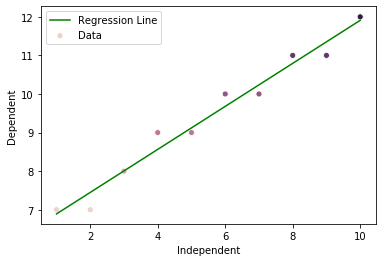

In [28]:
print('Basic Regression Diagnostics')
print('----------------------------')
print('Slope:', calc_slope(X,Y)) 
print('Y-Intercept:', y_int(Y, calc_slope(X,Y), X))
print('R-Squared:', r_squared(Y, Y_pred))
print('----------------------------')
print('Model: Y = 0.557*x + 6.33')

fig, ax = plt.subplots()
ax1 = sns.scatterplot(x= X, y= Y, hue=Y)
ax2 = sns.lineplot(x=x_pnts, y=y_pnts, color='green')
plt.xlabel('Independent')
plt.ylabel('Dependent')
plt.legend(['Regression Line','Data'])
plt.show()

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

In [32]:
# Make prediction for x = 4.5 and visualize on the scatter plot

x_new = 4.5
y_predicted = (calc_slope(X,Y)*x_new + y_int(Y, calc_slope(X,Y), X))
y_predicted



8.842424242424244

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 